# 💻 UnpackAI DL201 Bootcamp - Week 1 - Skills: Tabular

## 📕 Learning Objectives

* To apply the concepts of indexing and broadcasting to utilize Pandas to perform basic EDA 
* To understand the criteria to judge a dataset's quality and suitability 
* To have an appreciation for the value of the iPython shell to interact with a server
* To gain a command of loading CSV, JSON and Excel Files into Pandas
* To perform basic data wrangling and EDA
* Form a clear idea of what we want to predict/know/understand or solve
* Rapidly Explore a dataset by thinking about key information

## 📖 Concepts map


# Introduction
<hr style="border:4px solid gray"> </hr>

Now that we have learned about the core concepts which underly the pandas library, we can get down to the business of applying it. 

But again, it is important to get moving in the right direction, with a reasonable goal with a good chance of success. For this EDA is a great tool. EDA or Exploratory Data Analysis. The following article provides a great overview of the philosophy behind EDA.

https://www.statisticshowto.com/probability-and-statistics/data-analysis/#edadefinition

# Part 0 : Code preparation

In [4]:
#Imports 
!pip install pycaret[full] --user -qq
!pip install openpyxl matplotlib -qq
!git clone https://github.com/unpackAI/DL201.git

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pycaret
# Imports 
from pathlib import Path

#Kaggle config
DATA_DIR = Path('/kaggle/working/DL201/data') #uncomment for kaggle
IMAGE_DIR = Path('/kaggle/working/DL201/img') #Uncomment for Kaggle

# Local Config
#DATA_DIR = Path.home()/'Datasets'/'unpackAI'/'DL201'/'data'
#IMAGE_DIR = Path('../img') #uncomment for local machine

fatal: destination path 'DL201' already exists and is not an empty directory.


# Part 1: Loading the Data into a Dataframe
<hr style="border:4px solid gray"> </hr>

## Section 1 : Common file formats

For tabular data, most of the files encountered will be within the following groups. 

### Format 1 : CSV and TSV Files
<hr style="border:2px solid gray"> </hr>

Csv is short for comma seperated values. CSV files are designed to work with lists and tables of data.

They are the most lightweight kind of files. They have a long history going back around 50 years to the early 1970s. 

If you would like to learn more about it, this article gives more information. 

https://bytescout.com/blog/csv-format-history-advantages.html




Pandas has excellent functionality for csv files.

The method: ".read_csv" can handle almost all of the initial setup without passing any commands or arguments. However, sometimes we will need to input keyword arguments

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


Pandas has execellent functionality for csv files.

The method: ".read_csv" can handle almost all of the initial setup without passing any commands or arguements.

However, it is important to understand the following concepts

1. Seperator / Delimiter: How the file is broken up into value

2. Header: The column names

3. Encoding: Simply put, what language the file is written in e.g. English, Chinese

If we can pass these arguements to Pandas, it resolves a lot of the ambiguitites. If you end up needing more, you can check the pandas documentation here. 

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

#### Key Idea: Shape
<hr style="border:2px solid gray"> </hr>

Look at the information about the file, and see what the shape of it should be.

The width of the table(s) is going to correspond to the number of columns, variables, or features.

The length of the table is going to correspond to the number of rows, samples, or instances.

When the file loads, it should be the same shape that you expected, and if it is not, then it means that it did not load properly.

### Format 2 : Excel Spreadsheets
<hr style="border:2px solid gray"> </hr>

Excel Spreadsheets are another standard that are used. However, they have to have an additional layer of information storing.

Where csv files can store text or numerical information, Excel spreadsheets also need to store information about the formatting and style. For example, the fonts, size, color, highlighting, et. cetera. This information gets stripped away when you use .read_excel without any arguements. 

However, if you do need to get the formatting and style information that can be had using openpyxl or other libraries. 

### Format 3 : JSON
<hr style="border:2px solid gray"> </hr>

While CSV files are for tables, JSON is a format which is short for Javascript Object Notation. 

With the rise of the internet, csv was not sufficient anymore for HTML websites. This is because websites are heirarchical, with a nested HTML structure. Since Javascript is the nearly exclusive language of web browsers, JSON is used to transfer data over the web, especially APIs.

However, like how Javascript has little to do with Java, JSON has outgrown Javascript to become a file standard in and of its own. It is most often used in APIs. 

This means that if you need to get real time data for a model, it could come in JSON format. 

pandas.read_json() can make an API request and get data directly from the web. However, the JSON data needs to be organized in a way which is highly regular and translates to a table structure.

JSON is much more flexible than csv files, but has a different paradigm which will be covered in the NLP notebook.

### Format 4 : Proprietary File Formats 
<hr style="border:2px solid gray"> </hr>

Ideally, the data should be exported in a standard file format. However, some software or industries use their own formats. This is a cautionary place

There are two main reasons why they use a non standard file format. One reason would be that the table like structure of a csv or a hierarchical structure of a JSON file wouldn't fit the use case and would be inefficient way to store the data. 

The other main reason could be  that it they want this data to be locked into their ecosystem, so they make it difficult to read the files without using their proprietary software. 

If the data is not stored in a standard file format, this is a word of caution. If it can't be easily converted into an open format like .csv, then it may be a sign that the information needed to move forward is expertise that you may need to pay someone for because there's not a large open source community surrounding it..

## Section 2 : Encodings
<hr style="border:2px solid gray"> </hr>

It used to be that ascii and UTF-8 were the only encodings, but now there are many types and subtypes which are used for various reasons. 

One clear reason has to do with languages. Since Chinese and Japanese contain a much larger character set, they can't be encoded in the same way as European Languages. This leads to different standards being used.

Another reason is the country or region may use a different encoding. Europe has different standards than North America, as do other regions of the world. These differences may be arbitrary, but at the end of the day it means that pandas won't immediately recognize the file.

We also could consider that different applications and data sources use different encodings for internal reasons. If a CSV is exported from a proprietary software, they could use a different encoding with little explaination as to why.

While there are many reasons why these different encodings are used, what is important is that we need to find out which one is used.

The easiest way to do this is to see if other people have made use of this dataset and shared their efforts online as open source. You can control-f search their code to find pd.read_csv in order to see what encoding they use. This can be done while doing preliminary explorations of the data. 

The second way is to use a tool in python that can make a guess at the encodings called chardet, which is short for **character detection**

### Good Tool to find the coding of a file : chardet
<hr style="border:1px solid gray"> </hr>

This library can be used to quickly determine what the characters in the fle are and can save a lot of time. Feel free to skip over this part of the notebook if you don't have encoding problems, but keep it in mind for later.

https://dev.to/bowmanjd/character-encodings-and-detection-with-python-chardet-and-cchardet-4hj7

In [2]:
!pip install cchardet

from pathlib import Path
import sys

import cchardet as chardet


def detect_encoding(filename):
    """Detect encoding and return decoded text, encoding, and confidence level."""
    filepath = Path(filename)

    # We must read as binary (bytes) because we don't yet know encoding
    blob = filepath.read_bytes()

    detection = chardet.detect(blob)
    encoding = detection["encoding"]
    confidence = detection["confidence"]
    text = blob.decode(encoding)
    
    print(f'Prediction: {encoding} with {confidence} percent confidence')

    return (text, encoding, confidence)

sample_text_utf8 = "ça ne m'intéresse pas du tout "
sample_text_ascii = sample_text_utf8.encode("ascii","ignore")

file_handle = open('sample_text_utf', 'w')
file_handle.write(sample_text_utf8)
file_handle.close()

file_handle = open('sample_text_ascii', 'w')
file_handle.write(str(sample_text_ascii))
file_handle.close()

detect_encoding(filename="sample_text_utf")
detect_encoding(filename="sample_text_ascii")

Congratulations, you have now found the encoding of your file, and can now open in into pandas

## Section 3 : Seperators and Delimiters (.CSV vs.TSV)
<hr style="border:2px solid gray"> </hr>

The next important step is to understand the seperator. Similarly to how higher dimensional objects are all stored in memory as nested 1D arrays, these seperators are what tell the computer what the table is supposed to look like. 

If something goes wrong with the seperator, then the shape is going to be affected.  

Here, we have a very messy file, which is a list of Chinese Vocabulary from HSK3. It has a file ending of .txt which means that it doesn't tell pandas what to look for as the seperator.

This is a good example to use because most things are quite unclear, so we have to tell pandas everything.


In [4]:
hskVocabPath = DATA_DIR/'ChineseVocabulary'/'HSK Official With Definitions 2012 L3 freqorder.txt'

In [5]:
hskVocab = pd.read_csv(hskVocabPath)
print(hskVocab.shape)

(299, 12)


In [6]:
#hskVocab.head()

Because we did not specify the seperator, then the structure this data is not clear, which is why it comes out as a mess. However, there are clues in this .head() example. There are clear \t instances.

The \ forward slash character is very significant in computing because it's an escape character meant for the computer. You are not supposed to see it in a .txt file for humans to read.

If you see any forward slashes in this, it's a red flag. Now, since the method is called .read_csv, the default value for the separator is a comma (,).

However, there are also many instances of | being used as well. This shows us as \t in files.

        Let's specify the separator now.


In [7]:
hskVocab = pd.read_csv(hskVocabPath,
                       sep='\t'
                      )
print(hskVocab.shape)

(299, 5)


Now, this worked, but there is still something happening to the shape of the table. We had been expecting 300 words, but now there are 299. This means that Pandas is not interpreting the file correctly.

## Section 4 : File Headers and Indices
<hr style="border:2px solid gray"> </hr>

Now, the rows and columns are close, but are one off the indended shape, then the next thing we need to think about is confirming what the file header and indices are. 

We can confirm this with .head()

By looking at the first row, it offers clues to what to how the column names and the indices are contained in the original data. 

In [8]:
hskVocab.head()

,啊,啊.1,"a1, a2, a3, a4, a5","ā, á, ǎ, à, a","ah; (particle showing elation, doubt, puzzled surprise, or approval)"
0,还,還,"hai2, huan2","hái, huán",still; yet; in addition; even | repay; to return
1,把,把,"ba3, ba4","bǎ, bà",(mw for things with handles); (pretransitive p...
2,过,過,guo4,guò,to pass; to cross; go over; (indicates a past ...
3,如果,如果,ru2guo3,rúguǒ,if; in the event that
4,只,隻,"zhi3, zhi1","zhǐ, zhī",only; merely; just; but | (mw for birds and ce...


In place of columns, the first values in the table have been selected and inferred to be the names. 

As .head() shows it is clearly the case that this dataset has no columns names.

In [9]:
# Ahh???
hskVocab['啊'].iloc[0]


'还'

In [10]:
hskVocab = pd.read_csv(hskVocabPath,
                       header = None,
                       index_col = None,
                       sep='\t'
                      )
print(hskVocab.shape)

(300, 5)


Now the shape is correct, but now we need to name the columns. 

In [11]:
hskVocab.head()

,0,1,2,3,4
0,啊,啊,"a1, a2, a3, a4, a5","ā, á, ǎ, à, a","ah; (particle showing elation, doubt, puzzled ..."
1,还,還,"hai2, huan2","hái, huán",still; yet; in addition; even | repay; to return
2,把,把,"ba3, ba4","bǎ, bà",(mw for things with handles); (pretransitive p...
3,过,過,guo4,guò,to pass; to cross; go over; (indicates a past ...
4,如果,如果,ru2guo3,rúguǒ,if; in the event that


In [1]:
hskVocabColumns = ['Simplified','Traditional','Pinyin_Numeric','Pinyin_Accented','Definition']
hskVocab.columns = hskVocabColumns
hskVocab.head()

NameError: name 'hskVocab' is not defined

Now that these problems have been solved, we can move onto some basic EDA.

# Part 2: EDA (Exploratory Data Analysis)
<hr style="border:4px solid gray"> </hr>

Key idea: Coarse to fine

Let's get a broad idea of what it looks like with the goai lfo determing

*How clean is the dataset? 
    * How many missing values are there? 
    * Are there any columns containing messy data? 
<br></br>
What are the features?
    * What are the features (x)?
    * What is the target variable (y)?
    * Which features are most important and of interest?
        * How visible is it to the model? 
    * What kinds of variables are there?
        * What are the continuous variables?
            * Are they normally distributed? 
        * What are the categorical variables? 
            * Are they high or low cardinality? 
        

## Section 1 : Coarse EDA 
<hr style="border:4px solid gray"> </hr>

When performing EDA, the first steps involve getting the most high level information about the dataset, then exploring different parts of it with greater detail when you find something to focus on.

This is an excellent dataset about house prices, with a mix of continous and categorical variables to work with.

There is a large community of people who have published notebooks on almost every aspect of this dataset, so there are many examples of people taking different approaches. It is a good jumping off place to learn how different EDA and Preprocessing techniques can be applied to a relatively clean dataset.


https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code?competitionId=5407&sortBy=voteCount

In [13]:
housePricesFilePath = DATA_DIR/'house-prices'/'train.csv'

houses_df = pd.read_csv(housePricesFilePath,index_col=0)

In [14]:
houses_df.shape

(1460, 80)

In [15]:
print('Number of data points:') 
print(len(houses_df.values.flatten()))

Number of data points:
116800


In [16]:
houses_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### What are the features? 
<hr style="border:2px solid gray"> </hr>

In this case, we can look over the different features using the columns. Immediately, some columns should stick out as important over others.

In [17]:
houses_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Are there any typos or misspellings?

#### Are there any columns with names that are unclear?

This dataset uses abbreviations in the column names. However, these are well documented and can be looked up in a .txt file.

It is worth taking even just a cursory look at this to give an idea of what it means. 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

In [18]:
houses_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

For example, this refers to the shape of the lots. The dataset was collected in a city in a  US State known for it's agriculture industry. It is in an extremely flat area, and has few geographic barriers. As a result, most of the land is divided into squares or rectangles. If it isn't a regular shape, then it is most likely next to a body of water such as a lake or river. This explains why most of the data is in a geometric shape.

### Missing Values: What patterns float to the surface?
<hr style="border:2px solid gray"> </hr>

These are the first thing that we should look at when using tabular data. The Missing values tell a story. It is the most accessible way to judge the quality of a dataset. This is because it is very easy to index missing values. 

The number of and the distribution of missing values is an important first pattern to look at. 


In [19]:
missing_values_by_column = houses_df.isnull().sum()

In [20]:
missing_values_by_column[missing_values_by_column > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

What do these missing values tell us? 

In this, if we look at the variables related to Pools, Fences, Fireplaces, Alleys, and Garages, it's pretty clear that a missing value means that it doesn't have a garage. 

Since Ames, Iowa has low population density, apartments are much less common than single family houses. 

#### Are the missing values across rows? 

This code here counts the missing values by row. The index column counts the number of missing values by row, and the right column tells us how many samples in the dataframe contain that many rows.

In [21]:
missing_features_by_row = houses_df.isnull().sum(axis=1)
print(missing_features_by_row.value_counts())


4     635
5     501
3     132
10     60
6      58
9      32
2      16
11      7
8       5
7       5
15      4
14      3
1       2
dtype: int64


If the missing values appear more consistently in certain columns compared to others, we need to figure out why.

Here it appears that Most of the samples have missing values. It appears that these values are related to the homes not having certain features such as pools. 


In [22]:
contains_many_missing = houses_df[missing_features_by_row >= 10]

Here is a sample of the dataset where there are many missing rows in each sample. These statistics describe where the missing values are. 

It's 

In [23]:
contains_many_missing.isna().sum().sort_values(ascending=False)[:10]

PoolQC          74
Alley           73
MiscFeature     73
Fence           73
FireplaceQu     71
GarageQual      53
GarageType      53
GarageYrBlt     53
GarageFinish    53
GarageCond      53
dtype: int64

#### Are the missing values contained within the same samples?

Here, we can make a rapid hypothesis that these rows with missing values are likely going to be a different kind of housing unit. 

To test this guess, we can correlate the different features with the type of housing unit. 

In [24]:
contains_many_missing.corrwith(contains_many_missing['MSSubClass']).sort_values(ascending=False)[1:15]

GarageYrBlt      0.607223
KitchenAbvGr     0.491237
2ndFlrSF         0.424495
FullBath         0.386344
BsmtFinSF2       0.307401
WoodDeckSF       0.301552
MiscVal          0.252924
TotRmsAbvGrd     0.243361
GrLivArea        0.238996
BsmtFullBath     0.197529
OverallCond      0.196590
OverallQual      0.149784
YearRemodAdd     0.130486
EnclosedPorch    0.112195
dtype: float64

This here clearly shows this is the case. There are many strong correlations between the type of house, and the features that are not commonly in apartments. Although it is not the best structured way to do it, It is only one line of code that answers the question of why there are missing values.

There are missing values because of the differences between single family houses, and multi family apartment buildings and not due to poor data collection.

#### Are Missing values distributed randomly?

If it is hard to decern a pattern and figure out why there are many missing values, this is a red flag about how the quality of the data.

#### Do these missing values cast doubt on the validity of the data?

In this case, the missing values do not say something about the quality of the data, but rather one of the weaknesses of table based data structures. Because it is 2D every column needs to contain a place, even if it is missing. The way that well designed SQL databases get around this, problem is by constructing multiple tables linked together by primary and foriegn keys. If you come across data that has many .csv files, then it is very likely data extracted from an SQL Relational Database. 


 JSON is not limited by this factor. Since it is heirachical, each JSON cell can have as much or as little information as it needs. 


However, if there  are many missing values, this will present a problem.



### Does .head() or .sample() reveal any messy data? 
<hr style="border:2px solid gray"> </hr>

#### Are there any columns that should be numbers, but are represented as strings?

This can happen for various reasons and may need to be cleaned up like how it is in the Week 1 Concept Book on Broadcasting.

However, there is another reason, being that a column could be represented in a different way than before.

AutoML tools will handle this case, and encode them, however we may need to handle this later in the next week. 

#### Do you see any large blobs of text such as comments, reviews, or values seperated by commas, or tabs?

This dataset does not contain these large blobs and is relatively clean, but these columns could contain valuable information that can be extracted.

## Section 2 : Determining a Tentative Target Variable
<hr style="border:4px solid gray"> </hr>

This is the next thing we should look at. We should find what we want to predict in the dataset. Since it is the most important outcome, not only to the success of the project, but also to how the dependent variables are structured. 

Without a clear idea of what the target variable is, it's difficult to proceed.

### Is the Target Variable Continuous or Categorical? 
<hr style="border:2px solid gray"> </hr>

This is going to determine the kind of model that is going to be used. In this dataset the target variable is continuous because sales price can be any range of numbers. 

However, we could also structure the problem by trying to get a better idea on a subset of the data. Since the data was collected for general purposes, we might not be interested in all of it. In this case, having more data might create noise that obscures what we actually want to know and move us off the path of where we want to go. 

#### Can a target variable be created by binning? 
<hr style="border:2px solid gray"> </hr>

Here is an example of using a dataset in a way that is slightly unconventional. Rather than look at the data in terms of trying to predict housing prices. A much more interesting question is to see if we can extract information on the subprime mortgage crisis of 2008. 

In this, subprime morgages were in part caused by policy changes that allow kinds of lending by banks that were previously illegal. The ability to give out loans at this pace can be traced back to the 1990s when the US Federal Government created policies to incentivize home ownership. 

These policies accelerated after George Bush became president of the United States. 

In [25]:
((houses_df['YearBuilt'] > 2001) & (houses_df['YearBuilt'] < 2008) ).value_counts()
houses_df['target'] = houses_df['YearBuilt'] > 1999

Although this is not very carefully designed, it is going to carve out a rough picture of how the data can be repurposed, and the problems that are going to come out ahead.

The point is that rather than making qualitative guesses, we can get some quantitative data and base our next assumptions of what to do based on the results of using AutoML.

# Part 3 : Choosing a Machine Learning Model
<hr style="border:4px solid gray"> </hr>

## Leveraging AutoML

In the last few years, AutoML tools have unleased the power of low code machine learning models. What once took a data scientist to do, now can be achieved with a powerful computer and some basic understanding of statistics. 

This can allow us to rapidly test our assumptions about about the dataset, and get quantified information about the trends and correlations in the dataset.

For this, we first just need to know a little about what our target variable is, and if it is continuous or categorical. This will affect the types of models that we can use.

### Which type of model will you need?
<hr style="border:2px solid gray"> </hr>

If the target variable is continuous, we can use regression based models. If the target variable we are trying to predict is categorical, then it is a classification problem. Below are some code templates of how to use pycaret. 

### How to Load the data into pycaret?
<hr style="border:2px solid gray"> </hr>

from pycaret.regression import *

In [ ]:
!pip install numpy~=1.20

In [1]:
#!pip install pycaret -qq

from pycaret.classification import *
#from pycaret.regression import *

### Taking a sample. 

If the dataset is very large, we may want to take a sample of the dataset so that the training speed is much faster. 

Similarly to how public opinion polls of a few thousand participants can get an accurate picture of a population of millions, we can get a reasonably clear picture from a few hundred samples in few minutes or seconds rather than waiting for the algorithm to run for hours. 

In [2]:
sample = houses_df.sample(500)
target = 'target'


NameError: name 'houses_df' is not defined

Here, it is a good idea to remove these features from the dataset. Since the goal is to discover more about the years leading up to the 2008 housing crisis, there are variables which will correlate too strongly with our new target.

The first of these are columns containing information about the year. This should be concealed from the model because it will correlate too strongly and create bias.

In [ ]:


# This removes information about the years from the model, along with enclosed porch
# because it is a very strong predictor which isn't relevant to our question
sample.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],inplace=True,axis=1)



These columns below are going to drown out the features that are going to be useful in this repurposed dataset. 

They have to do with the quality of parts of the home which will obviously be higher in newer homes. 

The other ones have to do with the construction materials used in modern buildings being different than in older buildings. 

These both represent how correlation does not equal causation.

Of note, all of these were found using iterations of AutoML models. The entire process was much easier than finding them in a pile of 80 features because the model brought them to the surface.

In [ ]:

sample.drop(['ExterQual','Foundation','Exterior1st',
             'BsmtQual','OverallCond','HeatingQC',
             'EnclosedPorch','KitchenQual',
             'Exterior2nd','GarageFinish','BsmtFinType1']
            ,inplace=True,axis=1 )

In [30]:
# for regression models, uncomment this. 

#data_prep = setup(sample,target,session_id=42,feature_selection=True, remove_multicollinearity=True)

# for classification 
data_prep = setup(sample, target = target, session_id=42, fix_imbalance=True, feature_selection = True, remove_multicollinearity = True)


,Description,Value
0,session_id,42
1,Target,After1999
2,Target Type,Binary
3,Label Encoded,"False: 0, True: 1"
4,Original Data,"(1000, 67)"
5,Missing Values,1
6,Numeric Features,15
7,Categorical Features,51
8,Ordinal Features,0
9,High Cardinality Features,0


## Training the models
<hr style="border:4px solid gray"> </hr>

This line of code creates many miniature models to rapidly test to see which one is the most accurate. It this 

In [31]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9542,0.9807,0.8868,0.9239,0.9020,0.8723,0.8750,0.0290
et,Extra Trees Classifier,0.9485,0.9811,0.8691,0.9158,0.8892,0.8558,0.8584,0.0320
rf,Random Forest Classifier,0.9443,0.9803,0.8331,0.9288,0.8750,0.8396,0.8440,0.0390
gbc,Gradient Boosting Classifier,0.9428,0.9791,0.8930,0.8766,0.8821,0.8445,0.8468,0.0680
ada,Ada Boost Classifier,0.9328,0.9701,0.8511,0.8727,0.8570,0.8133,0.8173,0.0240
ridge,Ridge Classifier,0.9227,0.0000,0.9165,0.8007,0.8510,0.7995,0.8061,0.0070
lda,Linear Discriminant Analysis,0.9199,0.9731,0.9110,0.7961,0.8462,0.7927,0.7991,0.0120
qda,Quadratic Discriminant Analysis,0.9127,0.9058,0.8923,0.7857,0.8322,0.7740,0.7797,0.0100
lr,Logistic Regression,0.8526,0.9119,0.8379,0.6534,0.7316,0.6327,0.6444,0.2270
dt,Decision Tree Classifier,0.8497,0.8031,0.7132,0.6863,0.6914,0.5932,0.5997,0.0070


In [32]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9286,0.9809,0.8125,0.8667,0.8387,0.7929,0.7936
1,0.9714,0.9977,0.8750,1.0000,0.9333,0.9153,0.9186
2,0.9429,0.9906,0.9412,0.8421,0.8889,0.8506,0.8530
3,0.9429,0.9822,0.8235,0.9333,0.8750,0.8382,0.8409
4,0.9429,0.9678,0.8235,0.9333,0.8750,0.8382,0.8409
5,0.9857,0.9828,0.9412,1.0000,0.9697,0.9604,0.9611
6,0.9286,0.9761,0.8235,0.8750,0.8485,0.8018,0.8024
7,0.9286,0.9689,0.7647,0.9286,0.8387,0.7934,0.7996
8,0.8857,0.9850,0.5882,0.9091,0.7143,0.6469,0.6709
9,0.9855,0.9705,0.9375,1.0000,0.9677,0.9584,0.9592


In [33]:
#tuned_random_forest = tune_model(random_forest)
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9286,0.9780,0.8125,0.8667,0.8387,0.7929,0.7936
1,0.9714,0.9931,0.8750,1.0000,0.9333,0.9153,0.9186
2,0.9286,0.9789,0.9412,0.8000,0.8649,0.8168,0.8217
3,0.9143,0.9800,0.7647,0.8667,0.8125,0.7572,0.7597
4,0.9429,0.9512,0.8235,0.9333,0.8750,0.8382,0.8409
5,0.9714,0.9656,0.8824,1.0000,0.9375,0.9191,0.9221
6,0.9286,0.9745,0.8235,0.8750,0.8485,0.8018,0.8024
7,0.9000,0.9645,0.7647,0.8125,0.7879,0.7225,0.7231
8,0.9286,0.9711,0.7647,0.9286,0.8387,0.7934,0.7996
9,0.9565,0.9599,0.8750,0.9333,0.9032,0.8752,0.8760


# Interpreting the results
<hr style="border:4px solid gray"> </hr>

In [34]:
print(tuned_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


## What are the Key (X) Dependent Variables?
<hr style="border:4px solid gray"> </hr>

Next, is to get more familiar with the dataset, and try and guess what will be important to it. 

In [38]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9136,0.9648,0.8300,0.9022,0.8646,0.8013,0.8028


,HouseStyle_SFoyer,BsmtFinType2_LwQ,Neighborhood_Gilbert,BsmtFinType2_Unf,MSSubClass_20,BsmtFinSF1,HouseStyle_1.5Fin,SaleType_New,MasVnrType_not_available,HouseStyle_1.5Unf,...,MSZoning_RM,BsmtCond_Gd,Neighborhood_StoneBr,GarageCars_4,BsmtFinType2_GLQ,HouseStyle_1Story,LandContour_Lvl,After1999,Label,Score
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True,True,0.8330
1,0.0,0.0,0.0,1.0,0.0,1330.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True,True,0.9097
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,0.9868
3,0.0,0.0,0.0,1.0,1.0,998.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False,0.7653
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,0.7404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.0,0.0,0.0,1.0,1.0,360.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False,False,0.9633
297,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,0.8532
298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,0.7997
299,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False,False,0.5467


In [42]:
final_model = finalize_model(tuned_model)

### Which Features are the most Important to the Model? 
<hr style="border:2px solid gray"> </hr>

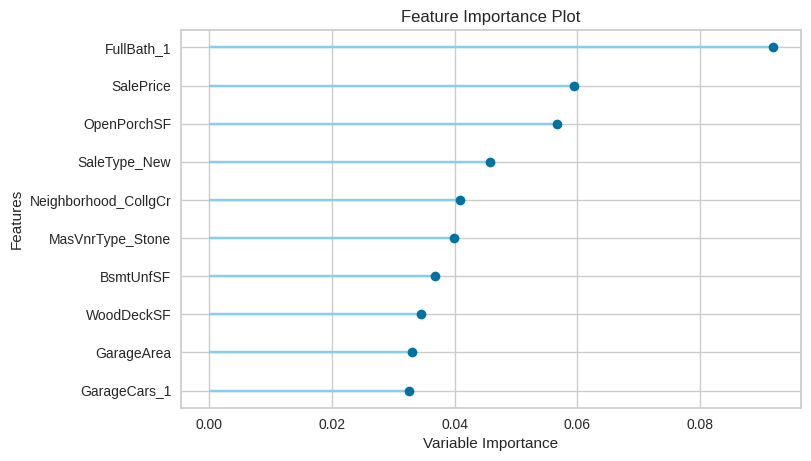

In [35]:
plot_model(tuned_model,plot='feature')

### Is this the expected behavior?

In this part, it is expected that Sales Price would be a strong predictor of when the houses were built. 

Although more work needs to be done to isolate this effect, it shows that houses built in the years leading up to the housing market collapse are priced differently than houses built before or after. 

The second interesting point is that the sale type with these houses sold as new in the years of the housing price bubble is a strong predictor.

### Did anything happen that you did not expect?

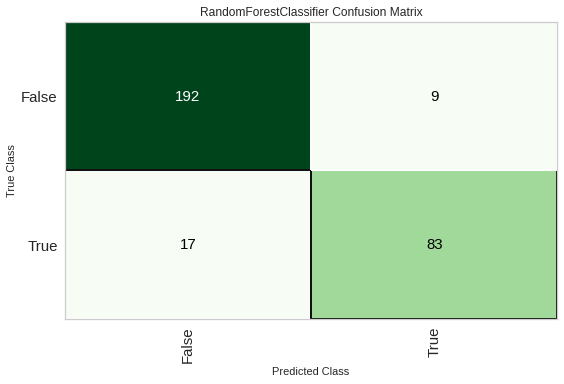

In [39]:
plot_model(tuned_model,plot='confusion_matrix')

In the process of training this model, I found that data had to be removed from the dataset, in order for the information which is valuable to my particular question to show up. 

In the next notebook, there is plenty of work that can be done on particularly the categorical variables in order to improve the model.

It is important to note that metrics like r2 and MSRE were nearly 100 percent accurate in the first model trainings because the information about the target variable was contained in the information containing years.

Although the model was 100% accurate, it was not valid. If the model's accuracy is unexpectedly high, then it may be a a sign that there's leakage. In this case, it is worth looking at variables with extremely high correlations.  

### Are there any variables which behaved unexpectedly?

In this iteration, there is still information that needs to be processed in a more precise way than before. For example, there's a variable about the open porch square feet which may be useful when trying to predict the price of the house, but not in this case.

I was hoping to see more variables related to the type of sale and how the house was purchased in this dataset. In the future, it will be a fruitful place to look. However, it is not very visible to the model because of how cluttered the categorical features are.

In the next notebook, we will go over how to extract key features by working more closely with the data.

# Part 4 : Discussions - Questions
<hr style="border:4px solid gray"> </hr>

1. Which file format is heirachical, and common on the web? Which file format is most like a table? 
    - A. CSV, JSON
    - B. .TXT, JSON
    - C. JSON, CSV
    - D. Matlab, CSV

2. What are the common errors that one will encounter when loading tabular data? 
    - A. Pandas doesn't know how the table is formatted, so the shape is off. (Seperator, Delimiter)
    - B. Pandas can't  open the file because it is encoded differently than the default UTF-8 (encoding)
    - C. Running out of RAM
    - D. Errors importing the Pandas Library 

3. What information should one check first when loading a dataset and why?
	- A. Column Names, Features. Because the column names will contain a lot of information about the dataset
	- B. Missing Values, because the table is full of rows of missing values that I didn't expect
	- C. Shape, to ensure that the table loaded properly
	- D. Highly Correlated Features, because missing values won't affect distributions or models

4. What are the advantages of employing autoML in EDA of tabular data? 